# Random Walk Modeling

During this seminar, we shall emulate the random walk of a knight on a chessboard. Then, we'll find a way to pick a random (uniformly chosen) spanning tree of a graph


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, rand 
import networkx as nx
%matplotlib inline

In [6]:
def GenKnightNetwork(boardSize):
    G = nx.Graph()
    pos = {}
    for col in range(boardSize):
        for row in range(boardSize):
            nodeId = row + col*boardSize
            pos[nodeId] = np.array([1.0*row/boardSize, 1.0*col/boardSize])
            newPos = GetLegalMoves(row, col, boardSize)
            for e in newPos:
                nid = e[0] + e[1]*boardSize
                G.add_edge(nodeId, nid)
    return G, pos

def GetLegalMoves(x,y,boardSize):
    newMoves = []
    moveOffsets = [(-1,-2),(-1,2),(-2,-1),(-2,1),
                   ( 1,-2),( 1,2),( 2,-1),( 2,1)]
    for i in moveOffsets:
        newX = x + i[0]
        newY = y + i[1]
        if isLegalCoord(newX,boardSize) and isLegalCoord(newY,boardSize):
            newMoves.append((newX,newY))
    return newMoves

def isLegalCoord(x,boardSize):
    if x >= 0 and x < boardSize:
        return True
    else:
        return False

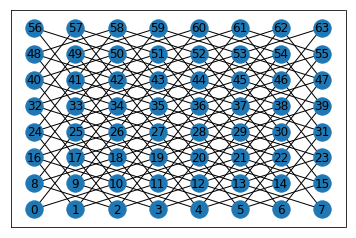

In [7]:
boardSize = 8
(G,pos) = GenKnightNetwork(boardSize)
nx.draw_networkx(G,pos)

_Next, we shall implement the random walk in a finite graph. This next function return a list of visited nodes (ordered). Depending on the value of_ ```till_first_return```, _it runs for a specified number of steps or until it comes back to the first vertex (yes, it shall happen)._

In [8]:
def RandomWalk(G, xi, n, till_first_return = False):
    nodeSeq = []
    nodeSeq.append(xi)
    if till_first_return:
        xInit = xi
        while True:
            xi = choice(list(G.neighbors(xi)),1)[0]       
            nodeSeq.append(xi)
            if xi == xInit:
                return nodeSeq
    else:
        for i in range(n):
            xi = choice(list(G.neighbors(xi)),1)[0]       
            nodeSeq.append(xi)
        return nodeSeq

Let us first walk around. Run this cell several time to see if behavior is homogeneous.

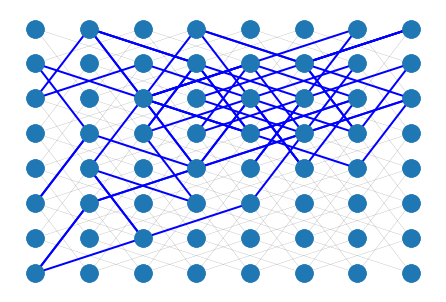

In [31]:
nodeSeq = RandomWalk(G, 0, 80)
edgeSeq = [(nodeSeq[i-1], nodeSeq[i]) for i in range(1,len(nodeSeq))]
nx.draw(G,pos,edge_color='gray',width=.2)
nx.draw(G, pos, edgelist = edgeSeq, edge_color='blue', width=2)

Now let us walk until we come back home. Run this cell several time to see if behavior is homogeneous.

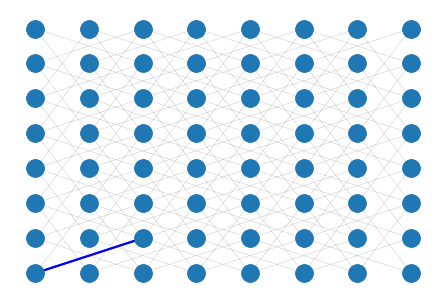

In [29]:
nodeSeq = RandomWalk(G, 0, 100, True)
edgeSeq = [(nodeSeq[i-1], nodeSeq[i]) for i in range(1,len(nodeSeq))]
nx.draw(G,pos,edge_color='gray',width=.2)
nx.draw(G, pos, edgelist = edgeSeq, edge_color='blue', width=2)